<a href="https://colab.research.google.com/github/ferrveciana/FastAiNotebooks/blob/master/Fast_ai_Lorena_Ferran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fast.ai Lorena-Ferran



En aquest exemple tinc una basse de dades que consta de dues carpetes de noms Ferran i Lorena on hi ha fotos de cadascú respactivament.

L'objectiu és crear un sistema de reconeixament que digui qui dels 2 es troba en aquesta foto.


In [4]:
#hide
!pip install -Uqq fastbook
import fastbook
#fastbook.setup_book()

     |████████████████████████████████| 51kB 2.4MB/s 
     |████████████████████████████████| 1.0MB 5.3MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 358kB 54.7MB/s 
     |████████████████████████████████| 40kB 5.9MB/s 
     |████████████████████████████████| 92kB 11.0MB/s 
     |████████████████████████████████| 61kB 8.8MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 2.6MB 46.0MB/s 


In [5]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [6]:
path = Path('/content/drive/My Drive/MyDatabase')
path

Path('/content/drive/My Drive/MyDatabase')

## Creating DataBlock and Training

In [ ]:
#mirar que tot siguin imatges
fns = get_image_files(path)
fns

(#225) [Path('/content/drive/My Drive/MyDatabase/Lorena/IMG_20200826_124201.jpg'),Path('/content/drive/My Drive/MyDatabase/Lorena/IMG_20200826_124157.jpg'),Path('/content/drive/My Drive/MyDatabase/Lorena/IMG_20200819_223937.jpg'),Path('/content/drive/My Drive/MyDatabase/Lorena/IMG_20200820_195830_1.jpg'),Path('/content/drive/My Drive/MyDatabase/Lorena/IMG_20200819_223938.jpg'),Path('/content/drive/My Drive/MyDatabase/Lorena/IMG_20200819_224007.jpg'),Path('/content/drive/My Drive/MyDatabase/Lorena/IMG_20200819_224514.jpg'),Path('/content/drive/My Drive/MyDatabase/Lorena/IMG_20200819_225149.jpg'),Path('/content/drive/My Drive/MyDatabase/Lorena/IMG_20200819_225407.jpg'),Path('/content/drive/My Drive/MyDatabase/Lorena/IMG_20200819_225554.jpg')...]

In [ ]:
#mirar que es puguin obrir
failed = verify_images(fns)
failed


(#0) []

In [ ]:
failed.map.(Path.unlink);

In [ ]:
path

Path('/content/drive/My Drive/MyDatabase')

In [ ]:
doc(DataBlock)

In [ ]:
persona = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128,170))

In [ ]:
dls = persona.dataloaders(path)

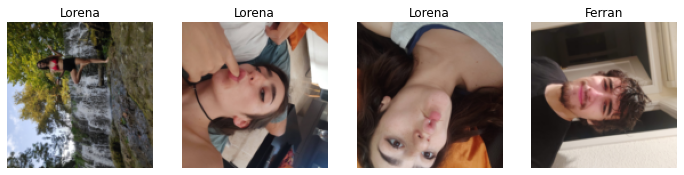

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

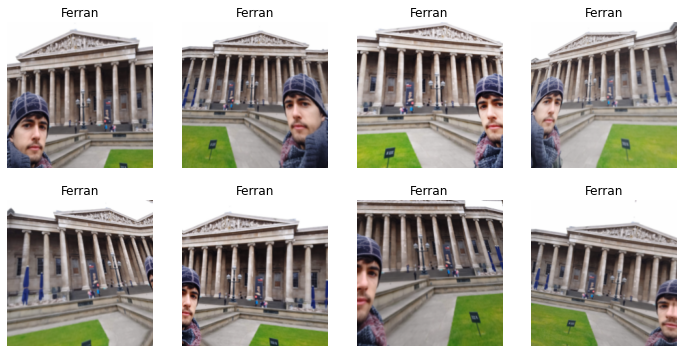

In [ ]:
persona = persona.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = persona.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
doc(cnn_learner)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.168390,1.483996,0.422222,01:36


epoch,train_loss,valid_loss,error_rate,time
0,0.837863,0.775890,0.288889,01:55
1,0.661905,0.287658,0.155556,01:56
2,0.519716,0.163173,0.066667,01:55
3,0.427780,0.159118,0.044444,01:54


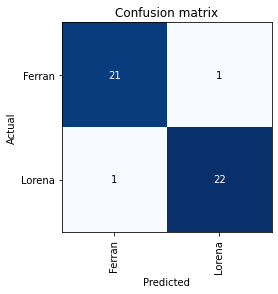

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

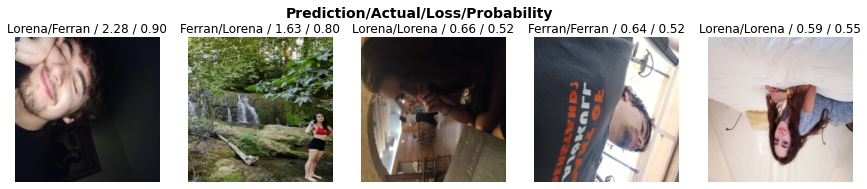

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
learn.path = path

In [ ]:
learn.export("export.pkl")

## Results



Utilitzant resnet18 i augTransform (2) i prou he obtingut un 13% d'error en el conjunt de validació.

lo mateix amb restnet34 - 15% error

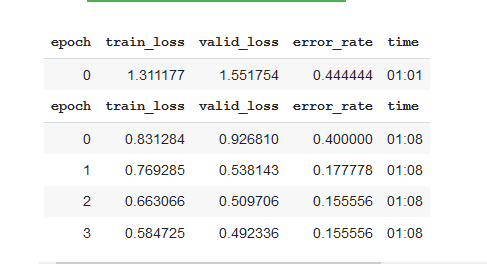

resnet 18 amb item_tfms=RandomResizedCrop(224, min_scale=0.5 i batch_tfms=aug_transforms()) al DataBlock


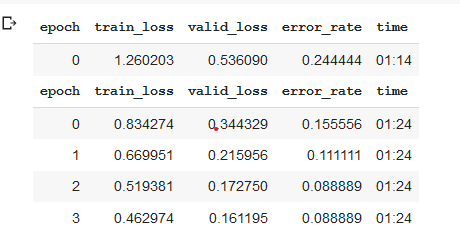



Amb mateixa config i resnet34 obtenim un error d'un 4.4%




## Inference learning

In [7]:
learn_inf = load_learner(path/'export.pkl')

In [8]:
learn_inf.predict('/content/drive/My Drive/Dad.jpg')

('Ferran', tensor(0), tensor([0.8384, 0.1616]))

In [47]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [32]:
img = PILImage.create(btn_upload.data[-1])

IndexError: ignored

In [45]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()

out_pl

Output()

In [36]:
with out_pl: display(img.to_thumb(128,128))

In [39]:
pred,pred_idx,probs = learn_inf.predict(img)

In [46]:
lbl_pred = widgets.Label()
lbl_pred.value = 'Please chose an image'
lbl_pred

Label(value='Please chose an image')

In [41]:
classify_but = widgets.Button(description = "Classify")
classify_but

Button(description='Classify', style=ButtonStyle())

In [44]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

classify_but.on_click(on_click_classify)

In [24]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [48]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, classify_but, out_pl, lbl_pred])

In [49]:
!pip install voila
!jupyter serverextension enable voila —sys-prefix

     |████████████████████████████████| 5.9MB 2.8MB/s 
     |████████████████████████████████| 184kB 29.1MB/s 
     |████████████████████████████████| 921kB 41.6MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: Pygments 2.1.3
    Uninstalling Pygments-2.1.3:
      Successfully uninstalled Pygments-2.1.3


Enabling: voila
- Writing config: /root/.jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
Enabling: —sys-prefix
- Writing config: /root/.jupyter
    - Validating...
Error loading server extension —sys-prefix
      X is —sys-prefix importable?
